<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [11]:
#! pip install --quiet vietocr
! pip install --upgrade pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 10.4.0 which is incompatible.


# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [4]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


In [6]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2024-08-21 06:54:34--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   605KB/s    in 0.5s    

2024-08-21 06:54:35 (605 KB/s) - ‘sample.zip’ saved [305969/305969]



In [7]:
! ls sample | shuf |head -n 5

55611.jpg
462_Repurchases_64997.jpg
072199003062.jpeg
461_PIGTAIL_57575.jpg
034097001515.jpeg


'ĐẶNG TRUNG LÝ'

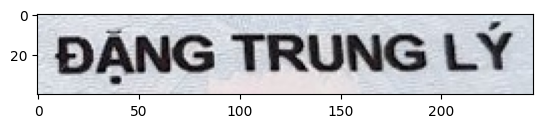

In [5]:
from PIL import Image
img = '/content/sample/001063014772.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [6]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2024-08-21 06:59:44--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  15.6MB/s    in 4.8s    

2024-08-21 06:59:50 (12.1 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [7]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [8]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [19]:
config = Cfg.load_config_from_name('vgg_transformer')

In [20]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':2000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'content/weights/transformerocrhihi.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [21]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 2000,
  'export': 'content/weights/transformerocrhihi.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_w

You should train model from our pretrained

In [23]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 156021.32it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 137580.40it/s]


Save model configuration for inference, load_config_from_file

In [24]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

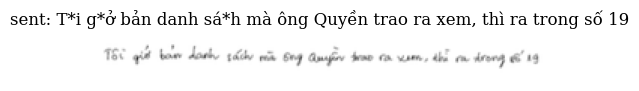

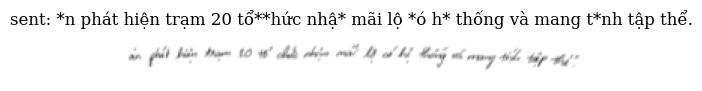

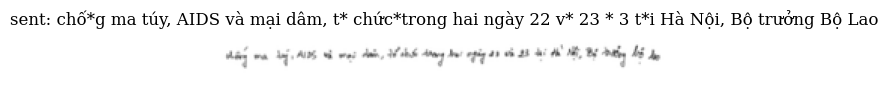

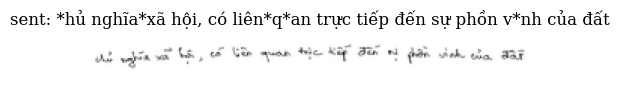

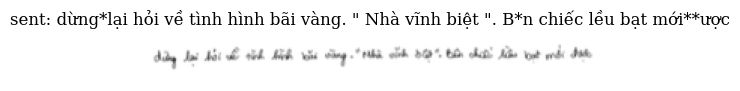

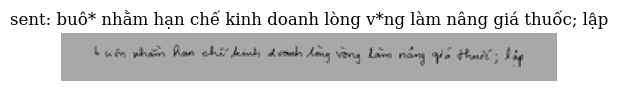

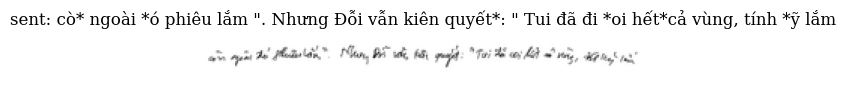

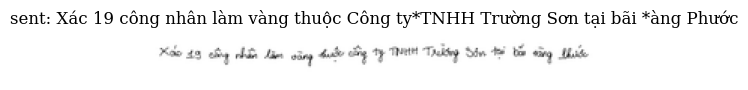

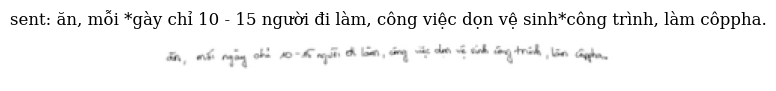

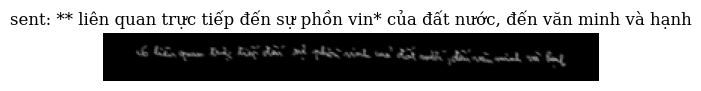

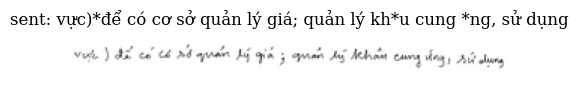

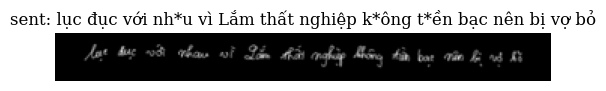

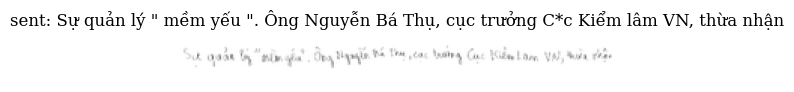

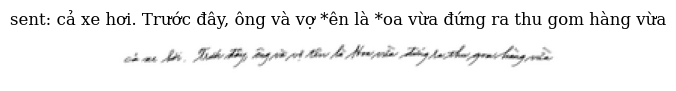

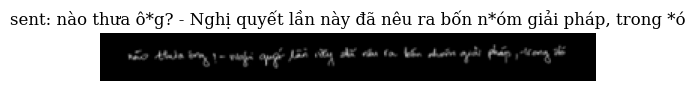

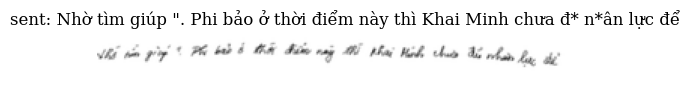

In [14]:
trainer.visualize_dataset()

Train now

In [25]:
trainer.train()

iter: 000200 - train loss: 1.398 - lr: 3.00e-04 - load time: 1.25 - gpu time: 80.29
iter: 000400 - train loss: 1.090 - lr: 2.91e-04 - load time: 0.85 - gpu time: 78.32
iter: 000600 - train loss: 1.019 - lr: 2.65e-04 - load time: 0.84 - gpu time: 78.90
iter: 000800 - train loss: 0.970 - lr: 2.25e-04 - load time: 1.23 - gpu time: 78.73
iter: 001000 - train loss: 0.930 - lr: 1.76e-04 - load time: 0.91 - gpu time: 78.25
iter: 001200 - train loss: 0.909 - lr: 1.24e-04 - load time: 1.17 - gpu time: 79.04
iter: 001400 - train loss: 0.886 - lr: 7.48e-05 - load time: 1.36 - gpu time: 78.34
iter: 001600 - train loss: 0.872 - lr: 3.49e-05 - load time: 0.70 - gpu time: 79.12
iter: 001800 - train loss: 0.859 - lr: 8.96e-06 - load time: 0.82 - gpu time: 78.40
iter: 002000 - train loss: 0.860 - lr: 1.43e-09 - load time: 0.73 - gpu time: 78.42


Visualize prediction from our trained model


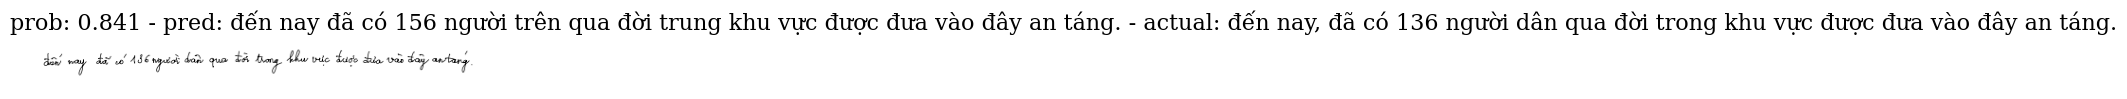

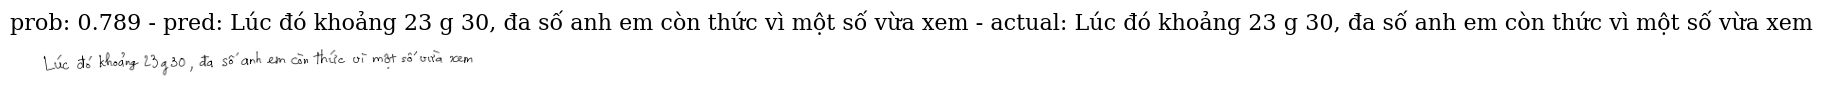

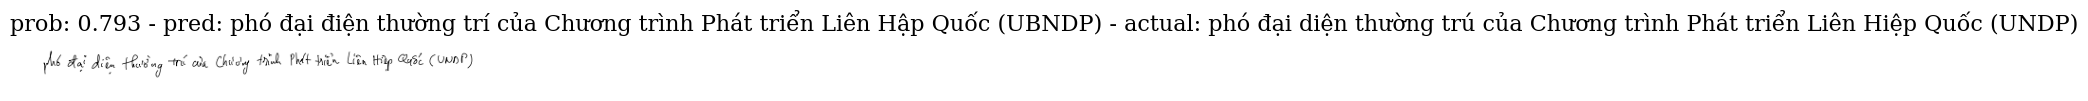

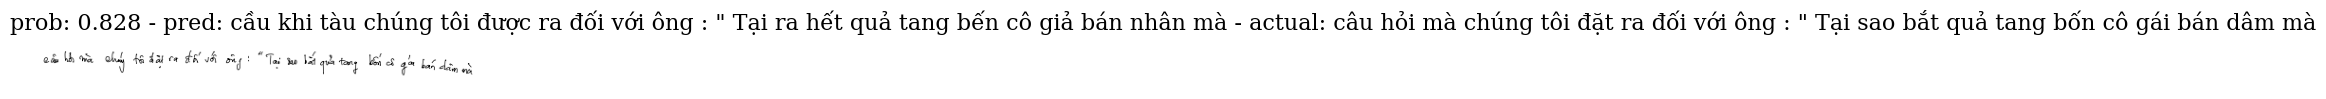

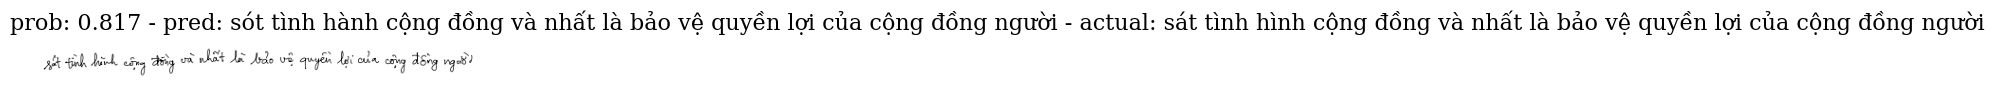

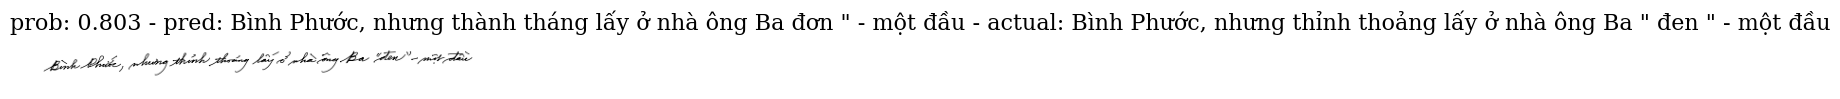

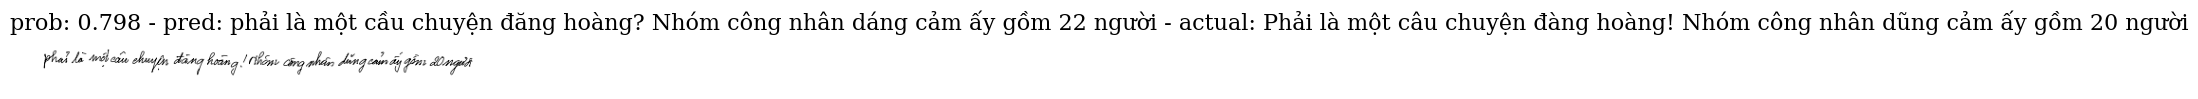

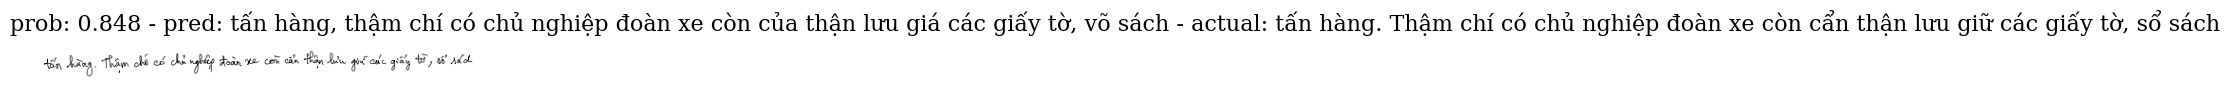

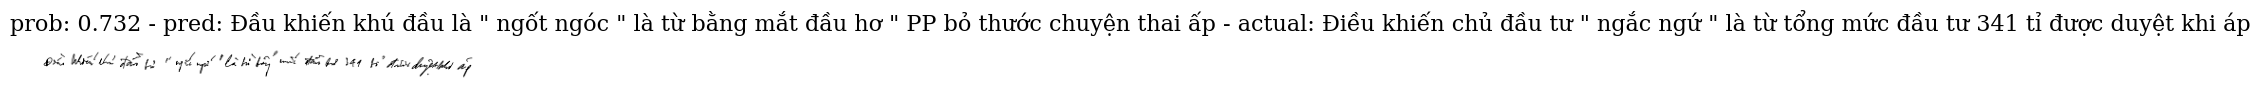

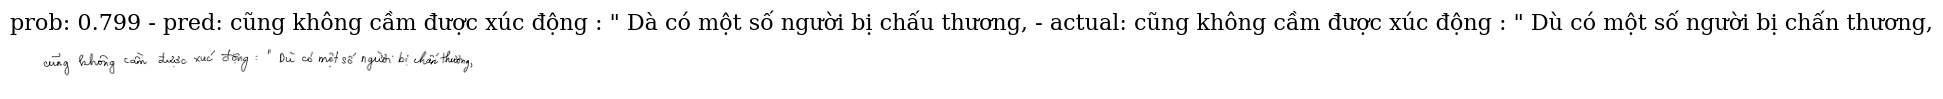

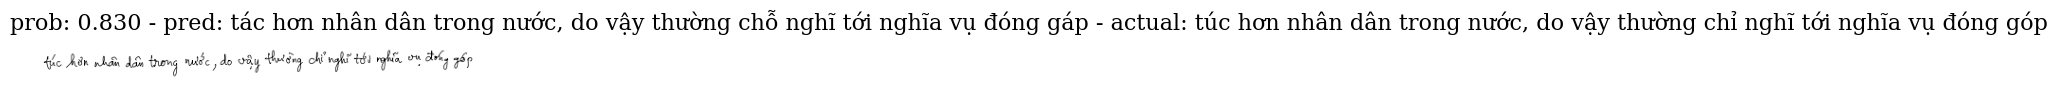

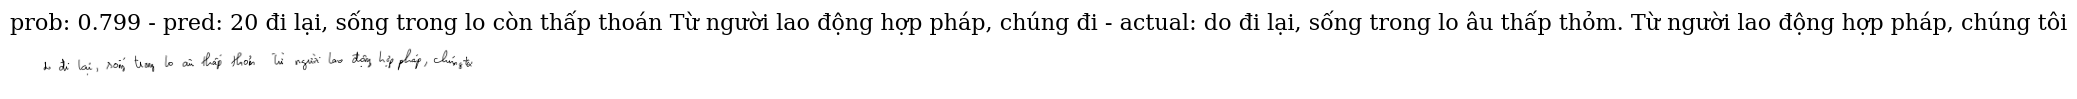

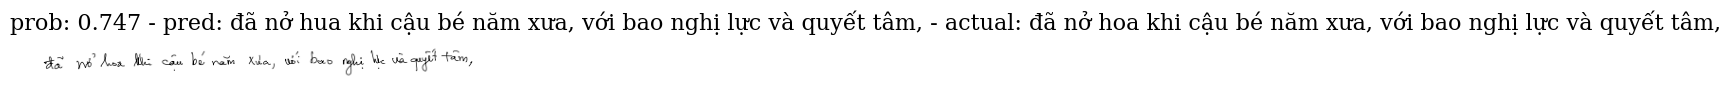

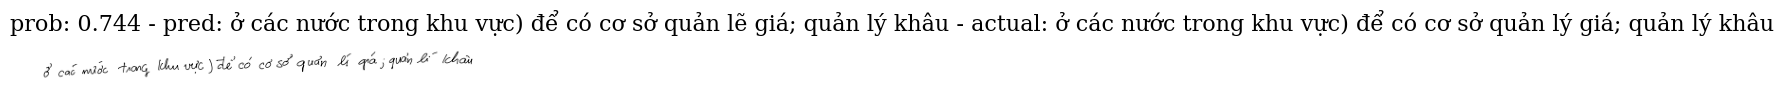

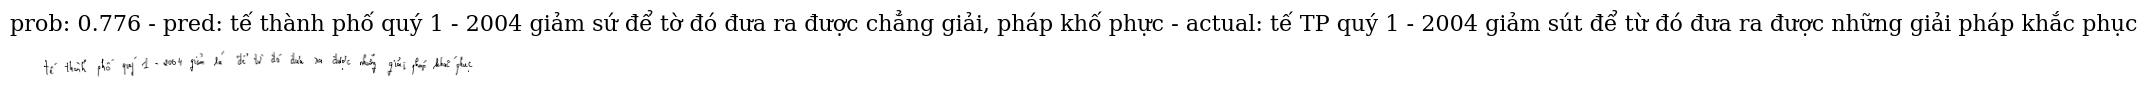

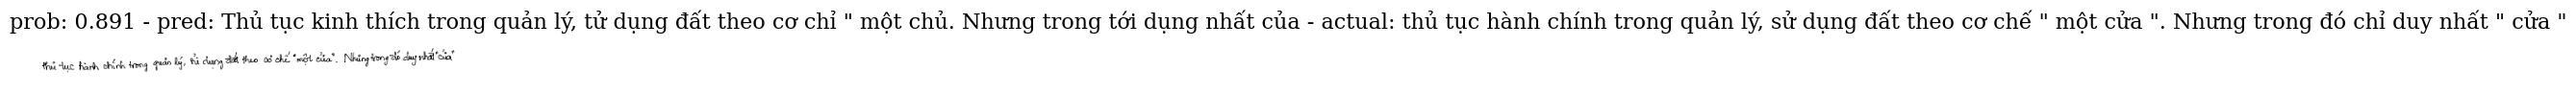

In [16]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [17]:
trainer.precision()

(0.024857954545454544, 0.5462431)

In [18]:
!cd ./weights


/bin/bash: line 1: cd: ./weights: No such file or directory
